# "Cross Entropy and its Significance to Machine Learning"
> "In this article, I will discuss what Cross Entropy means from an information theoretical point of view and how it relates to key concepts in Machine Learning, including the log-loss cost function in logistic regression classification and parameter estimation."

- toc: true
- branch: master
- bibliography: true
- math: true
- badges: true
- comments: true
- categories: [Tutorial, Information Theory, Cost Function, Maximum Likelihood Estimation, Entropy, Cross Entropy, Log-loss Function, Kullback-Leibler Divergence]
- image: images/prob_dist.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

## Introduction

Entropy in Thermodynamics is a measure of a system's disorder: the higher the disorder, the greater the entropy. Information can also be seen as a form of entropic measure. "Unordered" information is highly uncertain and presents us with more surprise than certain, organized facts. It is hence more "informative".

It is also of interest to note that most concepts in Thermodynamics have corresponding quantities in Information Theory. And this is not by chance, as the arrangement and the evolution of the state of matter relays information and, ultimately, tweaking with the properties of matter is how information is conveyed. Think about the way digital information is transmitted. The standard is to have it transmitted via fluctuations in electromagnetic waves. We modulate these waves with data.

Information Theory also finds its way in Machine Learning. Machine Learning is the science of finding patterns, of trying to elicit information from what we observe. I did not use the word information by chance, as the role of models, independent variables, and parameter estimation (in the traditional sense of Maximum-Likelihood estimation) is to obtain from complex observations the essentials for prognostics, prediction, clustering, and a myriad of other processing tools.

In what follows we will explore one very interesting quantity: the cross entropy. We will see that its main practical use is to compare a model to experimental data and to tell how much excess information is required for modeling data with a probability distribution different to the true distribution of the data. 

## Entropy as a Measure of Uncertainty

In order to understand cross entropy, we must first lay out the foundations of entropy. This quantity is a description of the uncertainty of a random variable. We want to measure how uncertain a probabilistic event is. Essentially, the more unlikely an event is, the more surprising it is and, consequently, the more information it holds. To say that we are observing that it is now raining contains no information. It is a certain event that bears no surprise. However, to say that there is a $35$% probability that it will rain tomorrow does contain information. If we were faced instead with a $50$% probability of rain, would we be more or less certain of tomorrow's weather? It seems reasonable to say that we would be less certain, because the $35$% probability of rain implies a probability of $65$% of no rain, whilst $50$% either way essentially leaves us with the most amount of doubt possible. This is an essential aspect of entropy: it is maximized for equally-likely events. Another illustrative example is a biased die and a fair die. Let us imagine that the biased die is heavily biased towards the six-dotted side such that for this die's events $\{1,2,3,4,5,6\}$, the corresponding set of probabilities is given by 

\\[
\left\lbrace \frac{1}{12},\frac{1}{12},\frac{1}{12},\frac{1}{12},\frac{1}{12}, \frac{7}{12} \right\rbrace
\\]. 

The fair die, on the other hand, follows the traditional distribution 

\\[
\left\lbrace \frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6} \right\rbrace 
\\].

If you were to gamble, which die would you pick? Which one makes you less uncertain of your choice, or, better still, which one decreases the entropy you experience? Evidently, it is **not** the fair die, for uniform distributions maximize entropy. No single side of the die seems more promising than the other.

As we can see, there is a relationship between the probabilities of a random variable's events and its entropy. Let $X$ be a random variable, $\mathcal{X}$ its support group, and $H(X)$ its entropy. According to [Cover-Thomas,2006], entropy is defined as

\\[
    H(X) \triangleq \sum\limits_{x \in \mathcal{X}} p_X (x) \log_2 \frac{1}{p_X (x)}  = -\sum\limits_{x \in \mathcal{X}} p_X (x) \log_2 p_X (x)  \tag{1}
\\]

where the $\log$ function is defined under base $2$. This gives us the basic unit of information: the bit. Entropy can also be computed with different base values, including $e$, in which case the unit of measurement becomes the "nat". It is useful to distinguish now between the information theoretical bit and the bit in computer science. In computer science, the bit is the basic unit of storage. It is the placeholder for data, even redundant, uninformative data. In Information Theory, the bit is the basic unit of actual information, stripped of all redundancy. 

Equation (1) has one important property: $H(x) \geq 0$, because probability values are greater than or equal to zero. This makes sense, as the natural interpretation of information leads to thinking in terms of having information or not having any.

Let us try the definition of entropy (1) with a numerical example. Let $X$ be a random variable with categories $\left\lbrace a,b,c,d \right\rbrace$. If the associated probabilities are $\{ 0.2,0.1,0.3,0.4 \}$, eq. (1) tells us that

$$
\begin{aligned}
    H(X) &= -p(a) \log_2 \left( p(a) \right) - p(b)  \log_2 \left( p(b) \right) - p(c) \log_2 \left( p(c) \right) -p(d) \log_2 \left( p(d) \right) \\
         &= -0.2 \log_2(0.2) - 0.1 \log_2(0.1) - 0.3 \log_2(0.3) - 0.4 \log_2(0.4)
\end{aligned}
$$

where $p(u)$ for $u \in \{a,b,c,d\}$ is a shorthand for $p_X (X = u)$.

In [22]:
#hide
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import string as string
import pprint

In [23]:
H_X = -0.2*np.log2(0.2) - 0.1*np.log2(0.1) - 0.3*np.log2(0.3) - 0.4*np.log2(0.4)
print(H_X)

1.8464393446710154


We observe that on average we can describe \( X \) with approximately \( 1.85 \) bits. Those are essential bits that cannot be discarded. If discarded, information would be lost. But let us say that we want to represent $X$ with $3$ bits for safety's sake. That is possible, and it would not result in any loss of information, but it does result in redundancy. In communication systems, such redundancy is very undesirable, since it results in a surplus of transmitted energy.

Another interpretation for entropy that will perhaps make it more intuitive is how many binary questions we have to ask to determine with certainty some piece of information. Say we have a random variable $Y$ with equally-likely events \( \{0,1,2,3,4,5,6,7\} \). Say we would like to determine one of those events, how many binary questions do we need? Intuitively, you may have already guessed that 3, hence 3 bits, but let us formalize the questions for $Y=1$, without incurring any loss of generality:

* Is $Y \geq 4$? No, therefore our set has been reduced to $\{0,1,2,3\}$.
* Is $Y \geq 2$? No, so our set is reduced yet again, this time to $\{0,1\}$.
* Is $Y \geq 1$? Yes, and we have found the targeted element.

It is interesting to note that the binary question approach is related to a Machine Learning strategy known as the random tree. And this is in fact very intuitive, as making the right cut-off questions may lead to data conditioning. Conditional probabilities produce lower entropy than marginal distributions. This is plain to see, as a conditioning random variable $X$ might give off some information about the conditioned variable $Y$. The conditional entropy $H(Y \mid X)$ follows the rule $H(Y \mid X) \leq H(Y)$, with equality iff $X$ and $Y$ are independent, i.e., they bear no information about each other. The concept of conditional entropy is also fundamental to the definition of mutual information, one of the most important quantities in Information Theory. However, for the sake of brevity, I will not go into detail about this aspect of the theory, but I would like to point the reader to [Cover-Thomas,2006] for more information. 

Based on the Boolean answers to the questions, we can even arrive at a possible binary code to event $Y=1$, namely $(001)_2$.

Now, let us focus on an important special case: that of Bernoulli-distributed random variables. Let $X$ be a random variable defined with two possible states $\{0,1\}$. These states are respectively defined by the following probabilities:

$$
\begin{aligned}
    p(0) &= 1 - \theta \\
    p(1) &= \theta 
\end{aligned}
$$

Now, let us vary $\theta \in [0,1]$ within its domain in order to observe the effects on the binary entropy $H(p)$.

In [24]:
def entropy(p,eps): # entropy function
    p = p+eps
    return -np.dot(p,np.log2(p))

In [25]:
eps = 1e-15 # added so that we do not have log(0), which is undefined

In [26]:
nel = 100 # creating the list of entropies for \theta = 0, 0.01, ..., 1
p_list = np.linspace(0,1,nel+1)
p_set = [np.array([p, 1-p]) for p in p_list]
Hp = [entropy(value,eps) for value in p_set]
dic = {'P(x=1)':p_list, 'Hp':Hp} # converting to a dictionary for the Seaborn library

Text(0.5, 1.0, 'Binary Entropy')

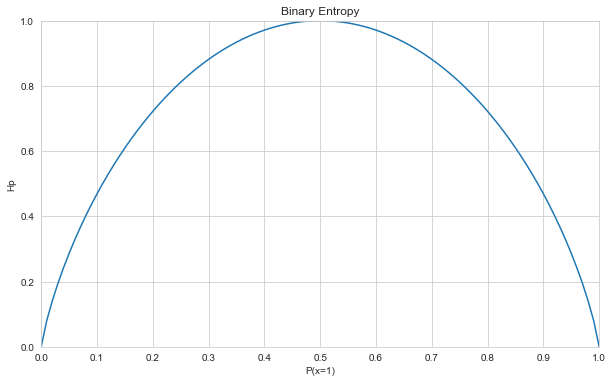

In [27]:
dfentropy = pd.DataFrame(dic) # plotting the binary entropy curve
sns.set_style("whitegrid")
fig_dims = (10, 6)
fig,ax = plt.subplots(figsize=fig_dims)
ax.set(xlim=(0,1), ylim=(0,1), xticks=np.linspace(0,1,11))
sns.lineplot(x="P(x=1)", y="Hp", ax=ax, data=dfentropy)
plt.title('Binary Entropy')

As we can see from the graph, the binary entropy $H(p)$ is zero at both $P(X=1) = 0 $ and $P(X=1) = 1$, because at those two points, the variable is not random; it is certain that it is $0$ and $1$, respectively. On the other hand, at $P(X=1) = 0.5 $, entropy is maximized, since both events are equally likely: $P(X=0) = 0.5$ and $P(X=1) = 0.5$. Consequently, we have the most uncertainty (one bit) at this point.

## Kullback-Leibler Divergence: The Distance Between Probability Density Functions

One quantity very closely related to the entropy is the Kullback-Leibler (KL) Divergence, also known as the relative entropy. Let $X$ be a random variable and let $p_X$ and $q_X$ (for which we will use for convenience the shorthand $p$ and $q$, respectively) be two distributions that describe the probability density function of $X$. The distribution $p$ is the true distribution, the one that generates the observed, experimental data. Distribution $q$, on the other hand, is a modeled distribution. It is the attempt to estimate $p$. According to [Cover-Thomas,2006], the KL Divergence is defined as

\\[
     D(p||q) \triangleq \sum\limits_{x \in \mathcal{X}} p(x) \log \frac{p(x)}{q(x)} \tag{2}
\\]

where the $D(p||q)$ is usually computed with the $\log$ function under base $e$.

The KL divergence measures how similar $q$ is to $p$. Concretely, it tells how much extra units of representation the distribution $q$ adds to the entropy of $X$. In order to observe this, let us go back to eq. (2):

$$
\begin{aligned}
 D(p||q) &= \sum\limits_{x \in \mathcal{X}} p(x) \log p(x) - p(x) \log (q(x)) \\ 
         &= -\sum\limits_{x \in \mathcal{X}} p(x) \log q(x) - H(X) 
\end{aligned}
$$

The sum term on the right is the cross entropy. For the time being, let us simply see it as a form of entropy computed as the expected value with regard to another probability distribution. Let us illustrate this with a numerical example. Let $X$ be a random variable and let its states be $\{a,b,c,d\}$ with probability distribution 

\\[
p = \left\lbrace \frac{1}{4}, \frac{1}{8}, \frac{1}{16}, \frac{9}{16} \right\rbrace
\\]

Its entropy is computed as 

In [28]:
entropy(np.array([1/4,1/8,1/16,9/16]), eps) * np.log(2) # entropy multiplied by log_e(2) to convert to nats

1.1034329096381947

Let us now compute the expected value with regard to a different probability distribution

\\[
q = \left\lbrace \frac{1}{4}, \frac{1}{4}, \frac{1}{4}, \frac{1}{4} \right\rbrace
\\]

This results in

$$
\begin{aligned}
    -\sum\limits_{x \in \mathcal{X}} p(x) \log q(x) &= -\frac{1}{4} \log \frac{1}{4} - \frac{1}{8} \log \frac{1}{4} - \frac{1}{16} \log \frac{1}{4} - \frac{9}{16} \log \frac{1}{4} \\
    &= -\log \frac{1}{4} \left( \frac{1}{4} + \frac{1}{8} + \frac{1}{16} + \frac{9}{16} \right) \\
    &= -\log \frac{1}{4}
\end{aligned}
$$

In [29]:
H_pq = -np.log(1/4)
print(H_pq)

1.3862943611198906


The subtraction between the last-computed value and the entropy, which results in approximately $0.283$ nats is the KL Divergence between $p$ and $q$, that is, the measured difference between the two distributions.

It is clear to see that the entropy represents the random variable more compactly. This is in fact another property of entropy. It represents the fewest possible number of information units necessary to describe on average a random variable.

If $q$ is equal to $p$, we have the expression $D(p||p)$, which computes to

$$
\begin{aligned}
 D(p||p) &=  -\sum\limits_{x \in \mathcal{X}} p(x) \log p(x) - H(X) \\
         &= H(X) - H(X) = 0
\end{aligned}
$$

This gives us another insight into the KL Divergence. Given that $-\sum_{x \in \mathcal{X}} p(x) \log q(x) \geq H(X) $ and $H(X) \geq 0$, then $D(p||p) \geq 0$ and it is equal to 0 iff $-\sum_{x \in \mathcal{X}} p(x) \log p(x) = H(X)$.

One last observation about the KL Divergence is that it is helpful to view it as the distance between two probability distributions. However, the KL Divergence is not a true distance measure, as it is not commutative, i.e, $ D(p||q) \neq  D(q||p)$. To show this, let us use $p$ and $q$ as previously defined.

In [30]:
def kullback_leibler(p,q,eps): # defining the KL Divergence function
    p = p+eps; q = q+eps
    return np.dot(p,np.log(p/q))

In [31]:
p = np.array([1/4,1/8,1/16,9/16])
q = np.array([1/4,1/4,1/4,1/4])
H_pq = kullback_leibler(p,q,eps)
H_qp = kullback_leibler(q,p,eps)
print([H_pq, H_qp])

[0.2828614514816974, 0.31712783136587464]


## Cross Entropy and its Relationship to the KL Divergence

We are now going to give a name to the quantity $-\sum_{x \in \mathcal{X}} p(x) \log q(x)$. As we hinted in the last section, this is the cross entropy $H_{p,q}$. Formally,

\\[
H_{p,q} = -\sum_{x \in \mathcal{X}} p(x) \log q(x) \tag{3}
\\]

This quantity is closely related to the KL Divergence, the difference being that it is the absolute number of representation units produced by the modeling distribution $q$ when describing random variable $X$, as opposed to the excess number of representation units defined by KL{% fn 1 %}.

Rearranging the definition of the KL Divergence, we can understand the cross entropy as the sum of the entropy of a random variable $X$ with the divergence caused by modeling it by a probability distribution $q$ other than the true distribution $p$:

\\[
    H_{p,q} = H(X) + D(p||q)
\\]

For empirical data, $p$ will rarely be known, because the random variables we will be working with depend on a large scale of phenomena, most of which are not taken into account on purpose in order to simplify the problem and to make it tractable for mathematical analysis. For instance, the white Gaussian noise in communication systems is not white nor Gaussian. It is an approximation that highlights only the dominant random phenomenon in the system, which is the movement of electrons within electronic wiring {% fn 2 %}. But it fails to take into account many other physical phenomena that are not quite Gaussian.

It is thus important to realise that most often we will be working with $q$.

## Cross Entropy as a Cost Function in Machine Learning

Cross entropy is a distance measure between distributions. It is not suprising then that it finds its way as a cost function in classification problems. It is, for instance, used as the cost function in logistic regression and in neural networks.

Let us analyse binary logistic regression. As we know from [Goodfellow et al., 2016], in a training set, for a sample $i$ and an $m$-dimensional vector $\mathbf{x}^{(i)} \in \mathbb{R}^m$ of input variables, the output $y^{(i)} \in \{ 0,1 \}$ is predicted by an estimator $\hat{y}^{(i)}$ given by

\\[
    \hat{y}^{(i)} = \sigma \left( \mathbf{w}^{\text{T}} \mathbf{x}^{(i)} + b \right)
\\]

where $\mathbf{w} \in \mathbb{R}^m$ is the weight vector applied to $\mathbf{x}$ and $b \in \mathbb{R}$ is the bias. The sigmoid function $\sigma: \mathbb{R} \rightarrow (0,1)$, given by

\\[
    \sigma(z) = \frac{1}{1 + e^{-z}},
\\]

simply returns as an output the probabilistic interpretation to the linear function it takes in. By choosing a threshold $th$ (usually but not necessarily chosen to be $0.5$), we can define the classification criterion $\gamma \left( \hat{y}^{(i)} \right)$ as

$$
\begin{aligned}
    \gamma \left( \hat{y}^{(i)} \right) = 
        \begin{cases}
            0,              & \text{if } \hat{y} < th \\
            1,              & \text{otherwise}
        \end{cases}
\end{aligned}
$$

We know the ground truth in a supervised problem. We remind the reader that certainty in entropic measure is directly related to zero and one probabilities. Therefore, for the classical two-state logistic regression problem, we have two possible "certain" probability distributions for the states $(0,1)$:

* $p(0) = 1$ and $p(1) = 0$ for the $0$-label and
* $p(0) = 0$ and $p(1) = 1$ for the $1$-label

Using the probability distribution notation, we will define for the respective $y^{(i)}$ labels $\mathbf{y}^{(i)} = \left( 1-y^{(i)}, y^{(i)} \right)$, where $y^{(i)} \in \{0,1\}$. And we use the prediction $\hat{y}^{(i)}$ for the following probability distribution

\\[
    \hat{\mathbf{y}}^{(i)} = \left( 1-\hat{y}^{(i)}, \hat{y}^{(i)} \right)
\\]

where $\hat{y}^{(i)} \in [0,1]$.

We can now use cross entropy to compute how far away the prediction $\hat{y}^{(i)}$ is from the ground truth $y^{(i)}$, obtaining the loss function for sample $i$:

\\[
    J^{(i)} (\mathbf{w}, b) \triangleq H_{\mathbf{y}^{(i)},\hat{\mathbf{y}}^{(i)}}
\\]

For the $m$ samples, we can define the average cost function:

\\[
    J (\mathbf{w}, b) \triangleq \frac{1}{m} \sum\limits_{i=1}^{m} H_{\mathbf{y}^{(i)},\hat{\mathbf{y}}^{(i)}}
\\]

Let us see the cross entropy used for two samples in a classification problem defining whether a picture depicts day (0 state) or night (1 state). For both samples, the ground truth is $\mathbf{y} = (0,1)$, i.e., the picture is taken at night. Running our classification logistic regression algorithm, we derive for sample $1$ $\hat{\mathbf{y}}^{(1)} = (0.3,0.7)$. For sample $2$, the output is $\hat{\mathbf{y}}^{(2)} = (0.85,0.15)$. Let us compare the loss functions $J^{(1)}$ and $J^{(2)}$.

In [32]:
def cross_entropy(p,q,eps):
    q = q+eps
    return -np.dot(p,np.log(q))

In [33]:
p = np.array([0,1]) # ground truth
q1 = np.array([0.3,0.7]) # prediction sample 1
q2 = np.array([0.85,0.15]) # prediction sample 2
J_1 = cross_entropy(p,q1,eps)
J_2 = cross_entropy(p,q2,eps)
print("J1 = " + str(J_1) + " and J2 = " + str(J_2))

J1 = 0.356674943938731 and J2 = 1.8971199848858746


We observe that the first loss function yields a smaller penalty. That is expected, as the distribution of sample $1$ is much more similar to $(0,1)$ than that of sample $2$. It seems reasonable then to define the parameter estimation problem as one in which we minimize the cost function $J$

\\[
    \left( \mathbf{w}^\ast, b^\ast \right) =  \text{arg} \min_{\mathbf{w},b} \, J( \mathbf{w}, b)
\\]

Let us step back and analyse the standard loss function for logistic regression, known in the Literature as the log-loss (LL) function [Goodfellow et al., 2016]:

\\[
    J_{\text{LL}}^{(i)} = -\left( y^{(i)} \log \hat{y}^{(i)} + \left( 1-y^{(i)} \right) \log 1-\hat{y}^{(i)} \right)
\\]

If we go back to the definition of the cross entropy (3), we can write $H_{\mathbf{y}^{(i)},\hat{\mathbf{y}}^{(i)}}$ out as

\\[
    H_{\mathbf{y}^{(i)},\hat{\mathbf{y}}^{(i)}} = -\left( y^{(i)} \log \hat{y}^{(i)} + \left( 1-y^{(i)} \right) \log 1-\hat{y}^{(i)} \right)
\\]

The expressions are identical. Does this imply that the log-loss function is an instance of cross entropy? No, the log-loss is obtained via another route. It is obtained via the Maximum-Likelihood (ML) estimation rule, which is all the more interesting, as this shows that Information Theory is directly linked to ML parameter estimation.

And how is the log-loss function derived via ML? Let $Y \in \{0,1\}$ be a Bernoulli random variable with probabilities $P(Y = 1) = \hat{y}$ and $P(Y = 0) = 1-\hat{y}$. Here samples $y$ can only assume values $0$ or $1$. Then,

$$
\begin{aligned}
    \max p(y \mid \hat{y}; \mathbf{w}, b) &= \max \hat{y}^y \left( 1-\hat{y} \right)^{1-y} \\
    \max \log \left( p(y \mid \hat{y}; \mathbf{w}, b)  \right) &= \max \log \left( \hat{y}^y \left( 1-\hat{y} \right)^{1-y} \right) \\
    \max \log \left( p(y \mid \hat{y}; \mathbf{w}, b)  \right) &= \log \hat{y}^y + \log \left( 1-\hat{y} \right)^{1-y} \\
    \max \log \left( p(y \mid \hat{y}; \mathbf{w}, b)  \right) &= y \log \hat{y} + (1-y) \log  1-\hat{y} 
\end{aligned}
$$

But maximization problems over a function $f(x)$ can always be framed as minimization problems over $-f(x)$. Therefore:

\\[
    \min \log \left( -p(y \mid \hat{y}; \mathbf{w}, b)  \right) = - \left( y \log \hat{y} + (1-y) \log  1-\hat{y} \right)
\\]

And we arrive once again at the same expression. 

The results detailed thus far for the binary case also apply to classification problems with $k>2$ categories. The only slight alteration is that the ground truth will be a $k$-dimensional vector of zeros, except for the true category, which will be set to $1$. 

Let us see some examples of logistic classification for $k=10$ states. First, let us choose two similar distributions $p$ and $q$.

In [34]:
p = np.random.rand(10) # creation of a random distribution p for 10 categories
p /= p.sum()
cats = list(string.ascii_lowercase[:len(p)]) # categories = [a,b,c,d,e,f,g,h,i,j]
dic = {'Category':cats, 'Probability':p}
dist = pd.DataFrame(dic) # dictionary for seaborn

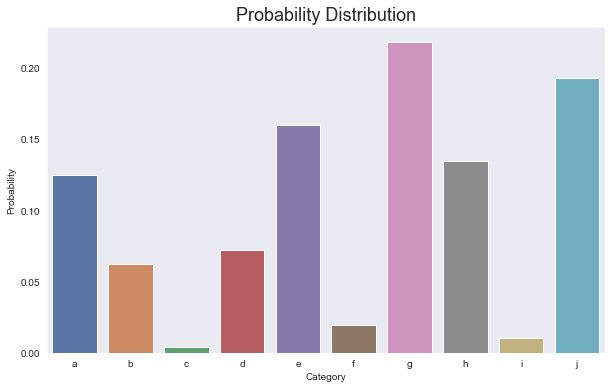

In [35]:
sns.set_style("dark") # plotting p
fig_dims = (10, 6)
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Category", y = "Probability", palette="deep", ax=ax, data=dist)
plt.title("Probability Distribution", size=18)
plt.show()

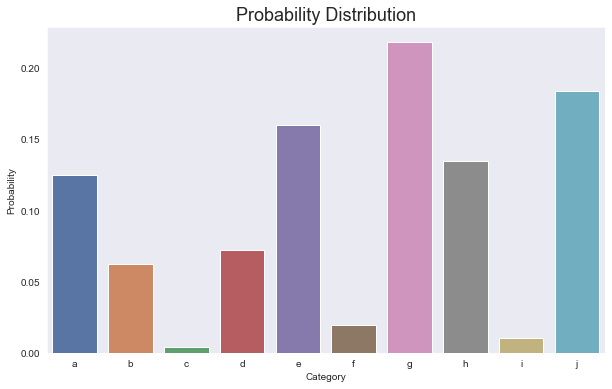

In [36]:
q = p.copy() # creating a model distribution q very similar to p
q[-1] = 0.95*p[-1] 
dic = {'Category':cats, 'Probability':q}
dist = pd.DataFrame(dic)
fig,ax = plt.subplots(figsize=fig_dims) # plotting q
sns.barplot(x = "Category", y = "Probability", palette="deep", ax=ax, data=dist)
plt.title("Probability Distribution", size=18)
plt.show()

Let us compute now the entropy of each distribution, their cross entropy and the KL Divergence.

In [37]:
H_p = entropy(p,eps) * np.log(2)
H_q = entropy(q,eps) * np.log(2)
H_pq = cross_entropy(p,q,eps)
KL = kullback_leibler(p,q,eps)
res = np.array([H_p,H_q,H_pq,KL])
print("[Entropy of p, Entropy of q, Cross Entropy, KL Divergence] = " + np.array2string(res))

[Entropy of p, Entropy of q, Cross Entropy, KL Divergence] = [1.98287009 1.97640812 1.99279537 0.00992527]


Since the model distribution $q$ is so close to the true distribution $p$, we see that their entropies are almost identical, that the cross entropy is virtually identical to them both, with just a small increment in infomation content, and that the KL divergence is close to zero.

Now, let us make $p$ and $q$ significantly different.

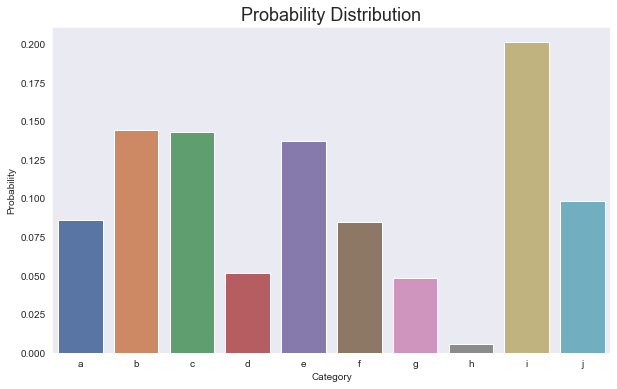

In [38]:
q = np.random.rand(10) # now choosing a complete random q (uncorrelated to p)
q = q/q.sum()
dic = {'Category':cats, 'Probability':q}
dist = pd.DataFrame(dic)
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Category", y = "Probability", palette="deep", ax=ax, data=dist)
plt.title("Probability Distribution", size=18)
plt.show()

In [39]:
H_p = entropy(p,eps) * np.log(2)
H_q = entropy(q,eps) * np.log(2)
H_pq = cross_entropy(p,q,eps)
KL = kullback_leibler(p,q,eps)
print([H_p, H_q, H_pq, KL])

[1.982870091128647, 2.1283195436307913, 2.8449835175037523, 0.8621134263751309]


Now that we uncorrelated $q$ to $p$, we observe that the cross entropy is significantly larger than the entropies of the individual random variables. In addition, the KL divergence reflects this phenomenon and is close to $0.5$ nats.

Let us now illustrate cross entropy applied to the classification problem, once again using $k=10$:

In [40]:
p = np.zeros(10)
p[0] = 1 
q = np.random.rand(10)
q /= q.sum()
H_p = entropy(p,eps)
H_q = entropy(q,eps)
H_pq = cross_entropy(p,q,eps)
KL = kullback_leibler(p,q,eps)
res = np.array([H_p,H_q,H_pq,KL])
print("Distribution p is given by " + np.array2string(p))
print("Distribution q is given by " + np.array2string(q))
print("[Entropy of p, Entropy of q, Cross Entropy, Kullback-Leibler]= " + np.array2string(res))

Distribution p is given by [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Distribution q is given by [0.05891559 0.13030953 0.08572364 0.16806776 0.047604   0.16081025
 0.01444581 0.09924925 0.13510793 0.09976623]
[Entropy of p, Entropy of q, Cross Entropy, Kullback-Leibler]= [4.46858580e-13 3.13413698e+00 2.83164950e+00 2.83164950e+00]


Distribution $q$ has very little correlation to $p$ since $p$ is randomly generated. This is evidenced by the high value of the cross entropy and the Kullback-Leibler Divergence. In the classification problem, something curious happens. Since a certain outcome has null entropy, the cross entropy becomes

\\[
    H_{p,q} = H(X) + D(p||q) = D(p||q),
\\]

which means the cross entropy and the KL Divergence end up displaying numerical equality. They are still different quantities, but they display the same outcome. And we could define the classification problem as being an optimization with regard to the KL Divergence. We could also define it based on the log-loss function. All three perspectives yield the same end result, but the cross entropy, the KL Divergence and the log-loss function are distinct quantities.

Let us now visualize the cross entropy graphically for the probability of a given state, from $0$ to $1$. Let us work on the same classification problem from before. We will modulate the probabilities of the first two states only and fix all the remaining to zero (we are saying that the remaining eight states are unreachable). This is done to reduce the number of degrees of freedom and to facilitate the observation of trends. Through this approach, we are de facto working within a binary subspace. This problem could be reframed as a standard binary classification problem between states $a$ and $b$. But we will keep the remaining states to show that the visualization that we present could be rendered much more general.

For this example, we will assume that state $b$ was selected, that is, $(0,1,0,0,0,0,0,0,0,0)$.

In [41]:
nel = 99 # p = 0, 0.01, ..., 0.99
q = np.zeros(10)
q[1] = 1 # ground truth - state b was selected
p_list = np.linspace(0, 0.99, nel+1)
N = 8 # padding - fixed zero probability states
p_set = [np.pad([1-p,p], (0,N), 'constant', constant_values=0) for p in p_list]
H_pq = [cross_entropy(value,q,eps) for value in p_set] 
KL = [kullback_leibler(value,q,eps) for value in p_set]
dic_pq = {'P(x=1)':p_list, 'H_pq':H_pq}
dic_KL = {'P(x=1)':p_list, 'KL':KL}

Text(0.5, 1.0, 'Kullback-Leibler Divergence')

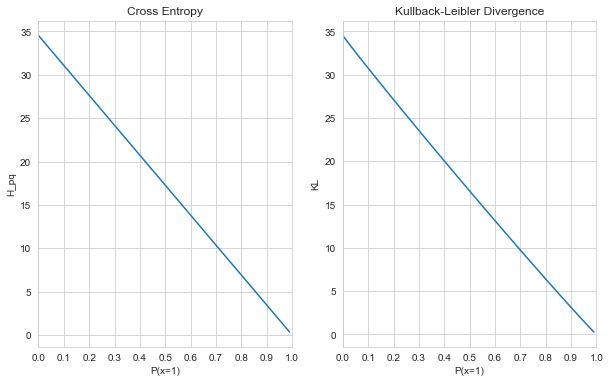

In [42]:
dfcross_entropy = pd.DataFrame(dic_pq) # plotting the Cross Entropy and the KL Divergence
dfkullback_leibler = pd.DataFrame(dic_KL)
sns.set_style("whitegrid")
fig_dims = (10, 6)
fig,ax =plt.subplots(1,2,figsize=fig_dims)
ax[0].set(xlim=(0,1), xticks=np.linspace(0,1,11))
sns.lineplot(x="P(x=1)", y="H_pq", data=dfcross_entropy, ax=ax[0])
ax[0].set_title('Cross Entropy')
ax[1].set(xlim=(0,1), xticks=np.linspace(0,1,11))
sns.lineplot(x="P(x=1)", y="KL", data=dfkullback_leibler, ax=ax[1])
ax[1].set_title('Kullback-Leibler Divergence')

We observe that in the classification problem there is a one-to-one correspondence between the Cross Entropy and the KL Divergence. Furthermore, we observe that as $P(X=1)$ approaches $1$ that the loss function (either one of the two quantities) reduces linearly to zero. This signifies that the prediction distribution is getting closer and closer to the distribution of the ground truth (the selection of state $b$).

## Additional Resources 

For more information on cross entropy I suggest you take a look at Aurélien Géron's excellent introduction to the topic. 

> youtube: https://www.youtube.com/watch?v=ErfnhcEV1O8

For a more in-depth coverage, I then suggest reading *Elements of Information Theory* by Thomas and Cover (2006), Chapter 5 of *Deep Learning* by Goodfellow, Bengio and Courville (2016), and *Machine Learning: A Probabilistic Perspective* by Kevin P. Murphy (2012). 

{{ 'The term "representation units" is being used, because, depending on the logarithmic basis, the fundamental unit of information may vary.' | fndetail: 1 }}

{{ 'This, by the way, is the source of heat in electronic devices.' | fndetail: 2 }}

## References

1.[Cover-Thomas,2006] Thomas M. Cover and Joy A. Thomas. 2006. Elements of Information Theory (Wiley Series in Telecommunications and Signal Processing). Wiley-Interscience, USA. 

2.[Goodfellow et al.,2016] Ian Goodfellow, Yoshua Bengio, and Aaron Courville. 2016. Deep Learning. The MIT Press.

3.[Murphy,2012] Kevin P. Murphy. 2012. Machine Learning: A Probabilistic Perspective. The MIT Press.

4.[Christopher-Bishop,2006] Christopher M. Bishop. 2006. Pattern Recognition and Machine Learning (Information Science and Statistics). Springer-Verlag, Berlin, Heidelberg.

